# **Phase 1 - Milestone 2**

**Ediashta Revindra Amirussalam**

FTDS - RMT - 020

## Objective

## 00 - Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from category_encoders.count import CountEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
pd.reset_option("all")

## 01 - Data Loading

In [34]:
#load data
data  = pd.read_csv('./laptops.csv')

In [35]:
#check head
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [36]:
data_copy = data.copy()

## 02 - EDA

In [37]:
#check data basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [38]:
#check data basic statistics
data.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


<Axes: xlabel='count', ylabel='Brand'>

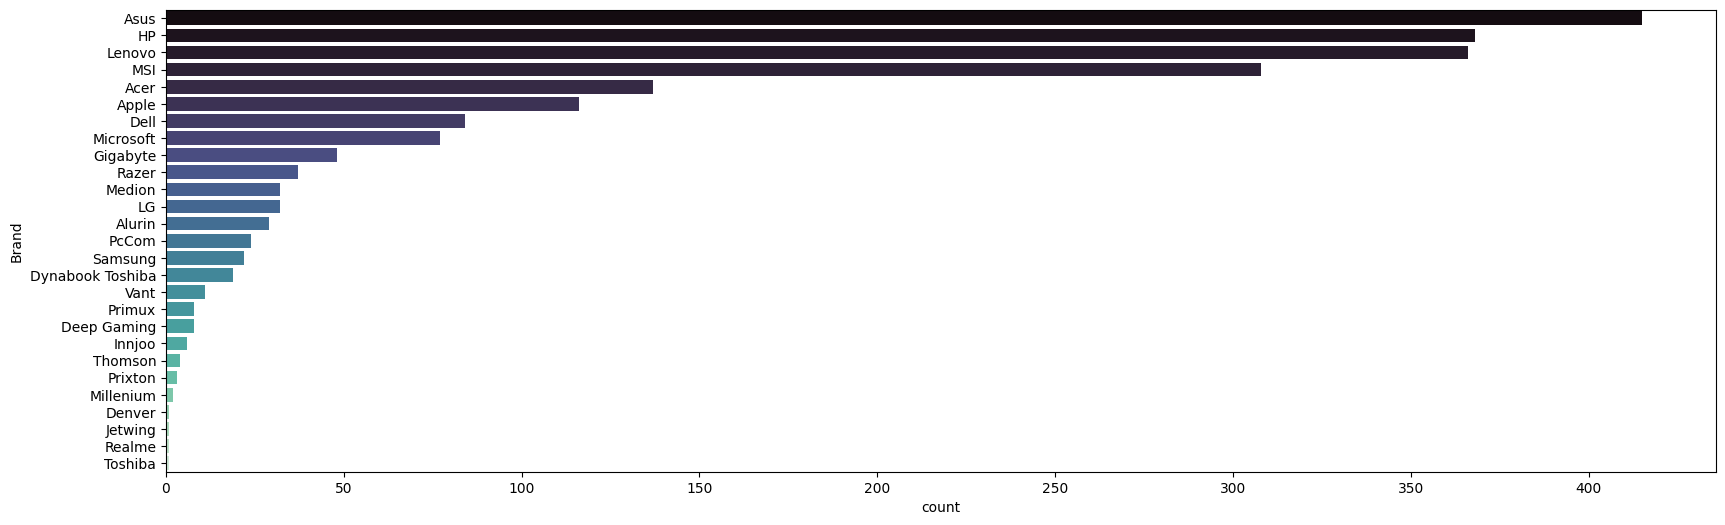

In [39]:
#check laptop specs
plt.figure(figsize=(20,6))
sns.countplot(data=data, y="Brand", order = data["Brand"].value_counts().index, palette="mako")

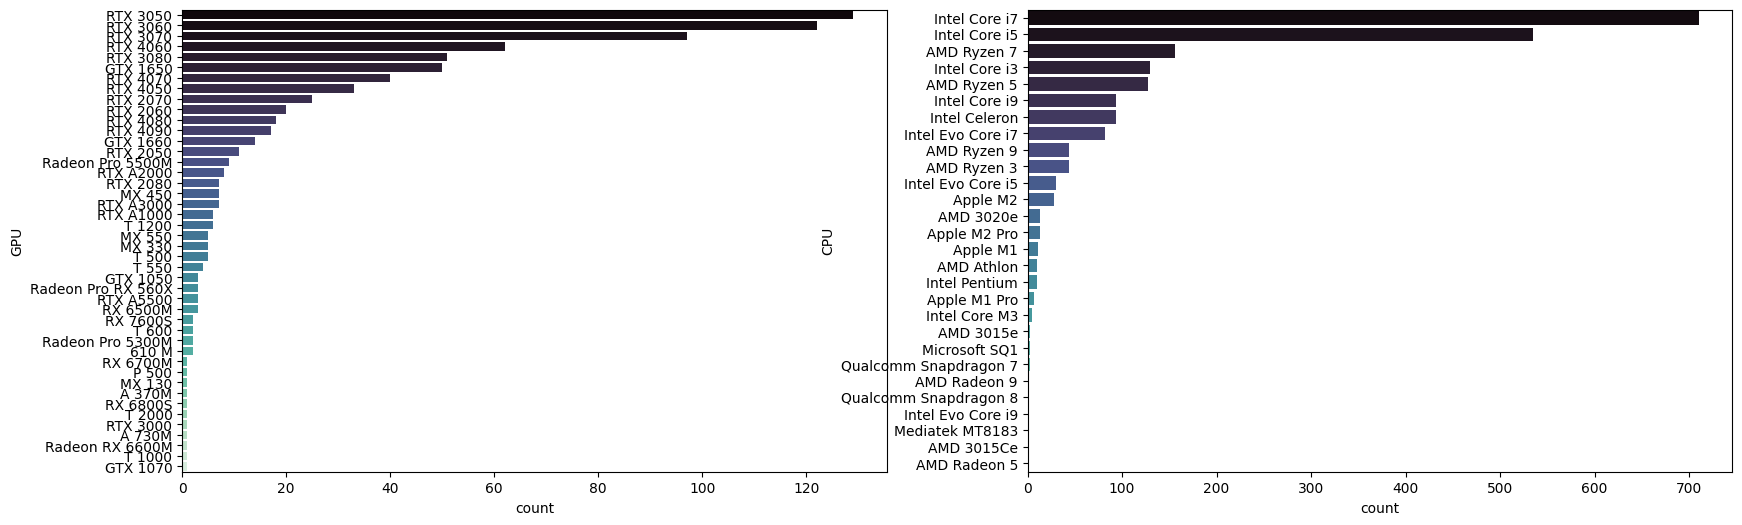

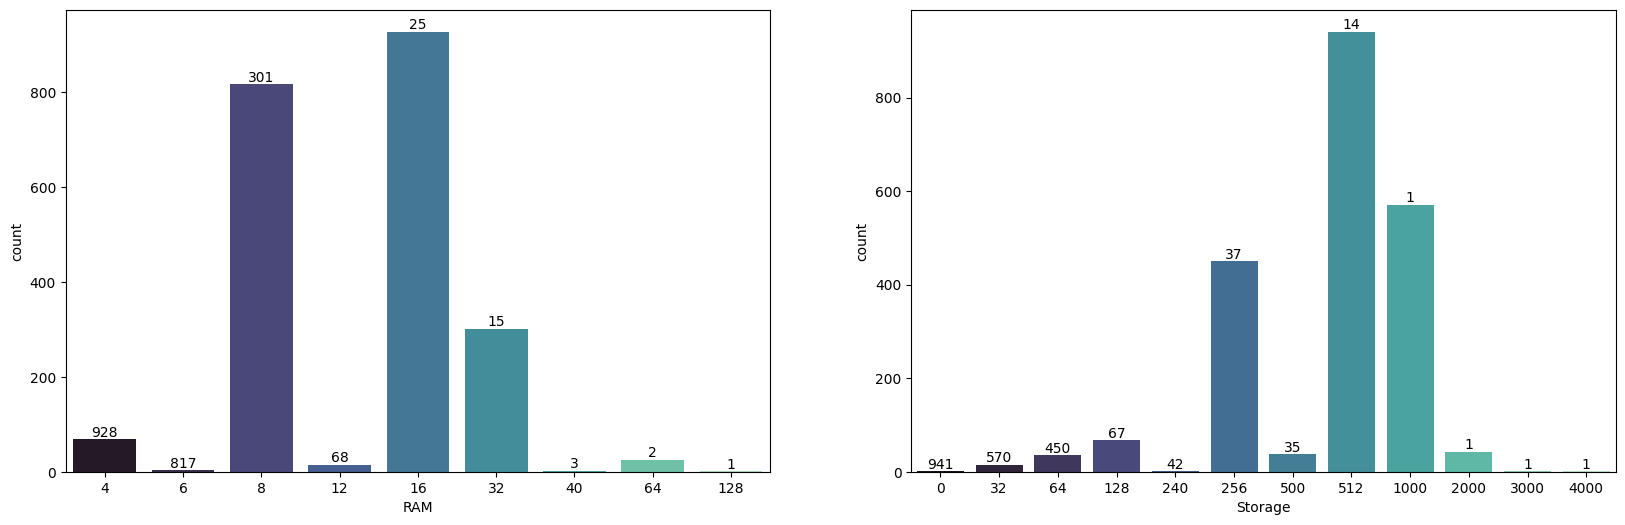

In [40]:
#check laptop specs
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(data=data, y="GPU", order = data["GPU"].value_counts().index, palette="mako")

plt.subplot(1,2,2)
sns.countplot(data=data, y="CPU", order = data["CPU"].value_counts().index, palette="mako")

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax1 = sns.countplot(data=data, x="RAM", palette="mako")
ax1.bar_label(container=ax1.containers[0], labels=data["RAM"].value_counts().values)

plt.subplot(1,2,2)
ax2 = sns.countplot(data=data, x="Storage", palette="mako")
ax2.bar_label(container=ax2.containers[0], labels=data["Storage"].value_counts().values)

plt.show()

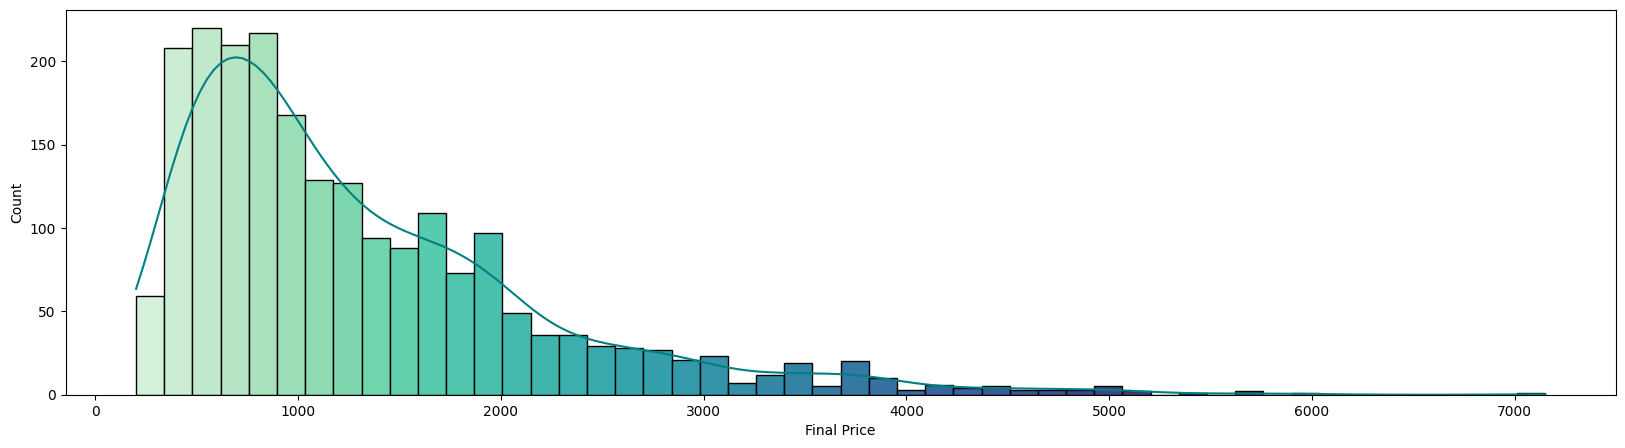

In [41]:
#check price distribution
plt.figure(figsize=(20,5))

palette = sns.color_palette("mako_r",50)

plot = sns.histplot(data=data, x="Final Price", kde=True, bins=50, color="teal")

for bin_,i in zip(plot.patches,palette):
    bin_.set_facecolor(i)
    
plt.show()

In [42]:
#handle screen cardinality
screen = pd.DataFrame(data["Screen"].value_counts().rename_axis('screen').reset_index(name='counts'))
sum = screen["counts"].sum()

for i in screen[(screen["counts"]/sum) < 0.05]["screen"]:
     screen.loc[screen["screen"] == i, "screen"] = "Other"
     
screen_new = screen.groupby(screen['screen']).aggregate({'screen': 'first', 'counts': 'sum'})

storage_type = pd.DataFrame(data["Storage type"].value_counts().rename_axis('storage_type').reset_index(name='counts'))
touch_type = pd.DataFrame(data["Touch"].value_counts().rename_axis('touch').reset_index(name='counts'))
status = pd.DataFrame(data["Status"].value_counts().rename_axis('status').reset_index(name='counts'))

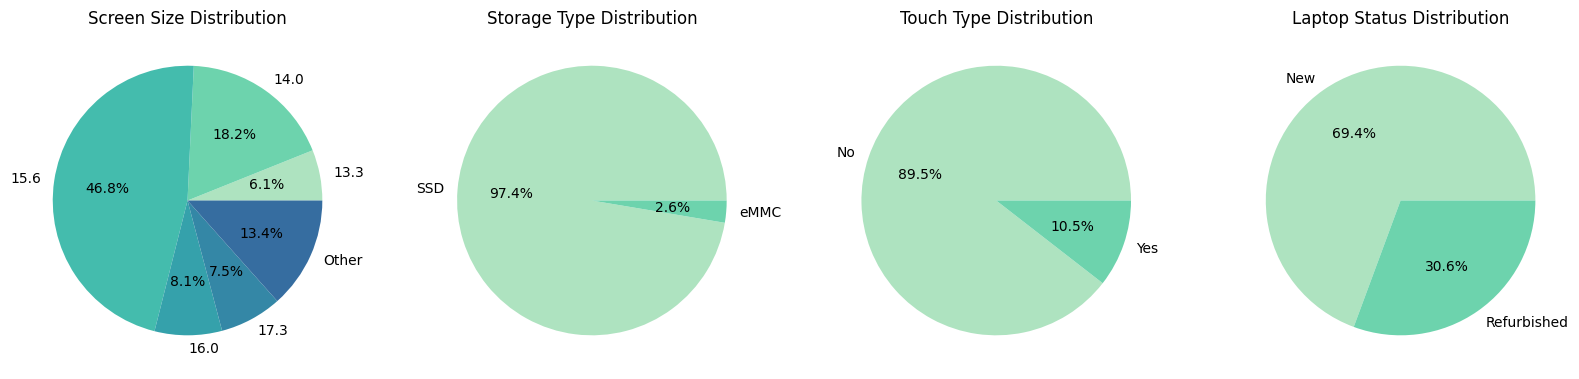

In [43]:
plt.figure(figsize=(20,5))

palette = sns.color_palette("mako_r",10)

plt.subplot(1,4,1)
plt.pie(screen_new["counts"], labels=screen_new["screen"], autopct='%1.1f%%', colors=palette)
plt.title("Screen Size Distribution")

plt.subplot(1,4,2)
plt.pie(storage_type["counts"], labels=storage_type["storage_type"], autopct='%1.1f%%', colors=palette)
plt.title("Storage Type Distribution")

plt.subplot(1,4,3)
plt.pie(touch_type["counts"], labels=touch_type["touch"], autopct='%1.1f%%', colors=palette)
plt.title("Touch Type Distribution")

plt.subplot(1,4,4)
plt.pie(status["counts"], labels=status["status"], autopct='%1.1f%%', colors=palette)
plt.title("Laptop Status Distribution")
plt.show()

In [44]:
#def cramers_v
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

Correlation
Status : 0.26450718170008297
Brand : 0.241996453068071
Model : 0.2519900783873629
CPU : 0.2517567086906365
GPU : 0.3422702941182396
Touch : 0.095355125133349


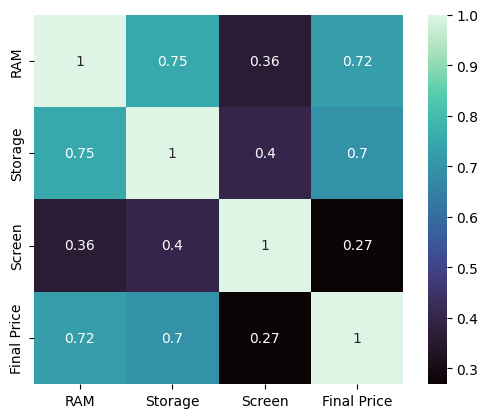

In [45]:
#check correlation plot

#correlation for numerical
corr_matrix = data[["RAM", "Storage", "Screen", "Final Price"]].corr(method="pearson")
sns.heatmap(corr_matrix, annot=True, cmap='mako', square=True)

#correlation for
print("Correlation")
print("Status :",cramers_v(data["Status"], data["Final Price"]))
print("Brand :",cramers_v(data["Brand"], data["Final Price"]))
print("Model :",cramers_v(data["Model"], data["Final Price"]))
print("CPU :",cramers_v(data["CPU"], data["Final Price"]))
print("GPU :",cramers_v(data["GPU"], data["Final Price"]))
print("Touch :",cramers_v(data["Touch"], data["Final Price"]))

## 03 - Feature Engineering

### Feature Selection

In [46]:
#rename columns
columns = data.columns.str.lower()

data.columns = columns

In [47]:
#drop laptop name
data.drop(columns="laptop", inplace=True)

In [48]:
data

,status,brand,model,cpu,ram,storage,storage type,gpu,screen,touch,final price
0,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...
2155,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


### Handle Missing Values

In [49]:
data.isnull().sum()

status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage type      42
gpu             1371
screen             4
touch              0
final price        0
dtype: int64

In [50]:
data_copy[data["storage type"].isnull()].head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
145,ASUS Chromebook CX1400CNA-BV0210 Intel Celeron...,New,Asus,Chromebook,Intel Celeron,8,32,NaN,NaN,14.0,No,349.00
189,Portátil Alurin Flex Advance Intel Core I5-115...,Refurbished,Alurin,Flex Advance,Intel Core i5,8,0,NaN,NaN,14.0,No,368.70
260,ASUS ROG Strix G16 G614JZ-N3008 Intel Core i7-...,New,Asus,ROG,Intel Core i7,32,1000,NaN,RTX 4080,16.0,No,2599.01
477,Prixton Flex Pro Intel Celeron N4020/4GB/64GB/...,New,Prixton,Flex,Intel Celeron,4,64,NaN,NaN,11.6,Yes,329.95
493,"Apple MacBook Pro Intel Core i5/8GB/256GB/13"" ...",Refurbished,Apple,MacBook Pro,Intel Core i5,8,256,NaN,NaN,13.0,No,634.25
569,"Alurin AMD R5 5500U 15.6"" 8 256 con SO",New,Alurin,Alurin,AMD Radeon 5,8,256,NaN,NaN,15.6,No,499.00
581,"Alurin Intel Core I7 12th 15.6"" 16 500 con SO",New,Alurin,Alurin,Intel Core i7,8,500,NaN,NaN,15.6,No,869.00
600,ASUS F515EA-BQ1625W Intel Core i3-1115G4/8GB/2...,New,Asus,F515,Intel Core i3,8,256,NaN,NaN,15.6,No,408.00
654,HP Chromebook x360 11 G3 Education Edition Int...,New,HP,Chromebook,Intel Celeron,4,32,NaN,NaN,11.6,Yes,282.57
728,HP Chromebook 11 G9 Intel Celeron N4500/4GB/32...,New,HP,Chromebook,Intel Celeron,4,32,NaN,NaN,11.6,No,230.14


dilihat dari jenis laptopnya serta jumlah storagenya, kita asumsikan tipe HDD

In [51]:
data["storage type"].fillna("HDD", inplace=True)

data["storage type"].value_counts()

storage type
SSD     2062
eMMC      56
HDD       42
Name: count, dtype: int64

In [52]:
data[data["gpu"].isnull()].head(10)

,status,brand,model,cpu,ram,storage,storage type,gpu,screen,touch,final price
0,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
4,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
6,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
10,New,Lenovo,V15,Intel Celeron,8,256,SSD,NaN,15.6,No,349.00
13,New,Lenovo,V15,AMD Ryzen 5,16,512,SSD,NaN,15.6,No,476.99
14,New,Lenovo,IdeaPad,AMD Ryzen 3,8,256,SSD,NaN,15.6,No,391.00


Memang laptop tanpa GPU atau laptop dengan integrated GPU, kita ganti dengan No GPU

In [53]:
data["gpu"].fillna("No GPU", inplace=True)

data["gpu"].isnull().sum()

0

In [54]:
data[data["screen"].isnull()].head()

,status,brand,model,cpu,ram,storage,storage type,gpu,screen,touch,final price
624,New,Acer,Extensa,Intel Core i5,8,256,SSD,No GPU,NaN,No,524.99
1430,New,HP,Envy,Intel Core i7,16,512,SSD,RTX 2050,NaN,Yes,1863.52
1503,New,Lenovo,IdeaPad,AMD Ryzen 5,16,512,SSD,RTX 3060,NaN,No,1505.00
1548,New,Lenovo,ThinkPad,Intel Core i7,16,512,SSD,RTX A2000,NaN,No,2569.00


In [55]:
data["screen"].fillna(15.6, inplace=True)

data.isnull().sum()

status          0
brand           0
model           0
cpu             0
ram             0
storage         0
storage type    0
gpu             0
screen          0
touch           0
final price     0
dtype: int64

### Handle Outliers

Semua data bersifat kategorikal sehingga tidak ada outliers

### Split Target and Feature

In [56]:
#split X and y
X = data.drop(columns="final price")
y = data["final price"]

### Split Train-Test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=5)

X_train.shape, y_train.shape

((1728, 10), (1728,))

### Feature Encoding

In [58]:
for i in X:
    print(X[i].unique(), "\n")

['New' 'Refurbished'] 

['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo' 'Medion' 'Acer' 'Apple' 'Razer'
 'Gigabyte' 'Dell' 'LG' 'Samsung' 'PcCom' 'Microsoft' 'Primux' 'Prixton'
 'Dynabook Toshiba' 'Thomson' 'Denver' 'Deep Gaming' 'Vant' 'Innjoo'
 'Jetwing' 'Millenium' 'Realme' 'Toshiba'] 

['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair' 'ThinkPad' 'VivoBook'
 'Akoya' 'Victus' 'V15' 'Thin' 'ROG' 'IdeaPad' 'Cyborg' 'M515UA' 'TUF'
 'Aspire' 'Pavilion' 'Vector' 'Chromebook' 'Omen' 'ZenBook' 'Creator'
 'MacBook Air' 'ThinkBook' '250' 'Modern' '255' 'MacBook Pro' 'Prestige'
 'Stealth' 'Pulse' 'Blade' 'Legion' 'Raider' 'ProBook' 'F515' 'G5'
 'Vostro' 'Nitro' 'Gram' 'E410' 'Flex Advance' 'Bravo' 'Aero' 'Yoga'
 'Galaxy Book' 'Erazer' 'Summit' 'Ultra' 'Extensa' 'Flex' 'EliteBook'
 'Revolt' 'Latitude' 'Envy' 'Deputy' 'Predator' 'Surface Laptop' '14w'
 'Titan' 'Ioxbook' 'Aorus' 'Swift' 'Surface Go' 'Netbook Pro'
 'Surface Pro' 'Notebook' '470' 'Spectre' 'Alurin' 'Satellite Pro' 'XPS'
 'ConceptD' 'E510' 'Beast'

In [59]:
#define column

label_col = ["brand", "model","cpu", "gpu", "storage type"]
onehot_col = ["status", "touch"]
num_col = ["ram", "storage", "screen"]

In [60]:
#define encoder and scaler

model_catboost = CountEncoder(handle_unknown=-1)
model_onehot = OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist')
model_scaler = MinMaxScaler()

In [61]:
transformers = ColumnTransformer([('catboost_encoder', model_catboost, label_col),
                ('onehot_encoder', model_onehot, onehot_col),
                ('scaler', model_scaler, num_col)])

## 04 - Model Definition

### Linear Regression

In [62]:
model_linreg = LinearRegression()

pipeline_linreg = Pipeline([
    ('transformer', transformers),
    ('linreg', model_linreg)
])

In [63]:
pipeline_linreg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('catboost_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               handle_unknown=-1),
                                                  ['brand', 'model', 'cpu',
                                                   'gpu', 'storage type']),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['status', 'touch']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['ram', 'storage',
                                                   'screen'])])),
                ('linreg', LinearRegression())])

### SVM

In [64]:
model_svm = SVR()

pipeline_svm = Pipeline([
    ('transformer', transformers),
    ('svm', model_svm)
])

In [65]:
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('catboost_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               handle_unknown=-1),
                                                  ['brand', 'model', 'cpu',
                                                   'gpu', 'storage type']),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['status', 'touch']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['ram', 'storage',
                                                   'screen'])])),
                ('svm', SVR())])

### Random Forest

In [66]:
model_rf = RandomForestRegressor()

pipeline_rf = Pipeline([
    ('transformer', transformers),
    ('rf', model_rf)
])

In [67]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('catboost_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               handle_unknown=-1),
                                                  ['brand', 'model', 'cpu',
                                                   'gpu', 'storage type']),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['status', 'touch']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['ram', 'storage',
                                                   'screen'])])),
                ('rf', RandomForestRegressor())])

###  XGBoost

In [68]:
model_xg = XGBRegressor()

pipeline_xg = Pipeline([
    ('transformers', transformers),
    ('xg', model_xg)
])

In [69]:
pipeline_xg.fit(X_train, y_train)

Pipeline(steps=[('transformers',
                 ColumnTransformer(transformers=[('catboost_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               handle_unknown=-1),
                                                  ['brand', 'model', 'cpu',
                                                   'gpu', 'storage type']),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['status', 'touch']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['ram', 'storage',
                                                   'screen']...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

## 05 - Model Evaluation

In [70]:
#train prediciton
y_pred_linreg_train = pipeline_linreg.predict(X_train)
y_pred_svm_train = pipeline_svm.predict(X_train)
y_pred_rf_train = pipeline_rf.predict(X_train)
y_pred_xg_train = pipeline_xg.predict(X_train)


#test prediction
y_pred_linreg_test = pipeline_linreg.predict(X_test)
y_pred_svm_test = pipeline_svm.predict(X_test)
y_pred_rf_test = pipeline_rf.predict(X_test)
y_pred_xg_test = pipeline_xg.predict(X_test)

y_pred= pd.DataFrame([["Linear Regression", y_pred_linreg_train, y_pred_linreg_test], 
                      ["SVM", y_pred_svm_train, y_pred_svm_test], 
                      ["Random Forest", y_pred_rf_train, y_pred_rf_test], 
                      ["XGBoost", y_pred_xg_train, y_pred_xg_test]], 
                     columns=["model", "train", "test"])

In [71]:
print("Linear Regression")
print("MAE - Train :", mean_absolute_error(y_pred=y_pred_linreg_train, y_true=y_train))
print("MAE - Test :", mean_absolute_error(y_pred=y_pred_linreg_test, y_true=y_test))
print("RMSE - Train :", mean_squared_error(y_pred=y_pred_linreg_train, y_true=y_train, squared=False))
print("RMSE - Test :", mean_squared_error(y_pred=y_pred_linreg_test, y_true=y_test, squared=False))

Linear Regression
MAE - Train : 382.92021001690216
MAE - Test : 398.34879868488207
RMSE - Train : 544.6112043261712
RMSE - Test : 552.2656350386785


In [77]:
for index, row in y_pred.iterrows():
    print(row['model'])
    print("MAE - Train :", mean_absolute_error(y_pred=row['train'], y_true=y_train))
    print("MAE - Test :", mean_absolute_error(y_pred=row['test'], y_true=y_test))
    print("RMSE - Train :", mean_squared_error(y_pred=row['train'], y_true=y_train, squared=False))
    print("RMSE - Test :", mean_squared_error(y_pred=row['test'], y_true=y_test, squared=False))
    print()

Linear Regression
MAE - Train : 382.92021001690216
MAE - Test : 398.34879868488207
RMSE - Train : 544.6112043261712
RMSE - Test : 552.2656350386785

SVM
MAE - Train : 609.4848498946164
MAE - Test : 624.8547288131573
RMSE - Train : 902.5118627920435
RMSE - Test : 892.6721862484392

Random Forest
MAE - Train : 113.34291282559931
MAE - Test : 258.2454110999664
RMSE - Train : 177.06120739501728
RMSE - Test : 436.9972139110161

XGBoost
MAE - Train : 94.20788013882105
MAE - Test : 234.06598044077558
RMSE - Train : 151.69757021853522
RMSE - Test : 401.3694400310594



In [82]:
y_pred_linreg_train

array([ 945.36608212,  728.34247263,  718.01064982, ..., 2159.08631264,
        591.9042974 , 1731.49479593])

Text(0, 0.5, 'Y Predict')

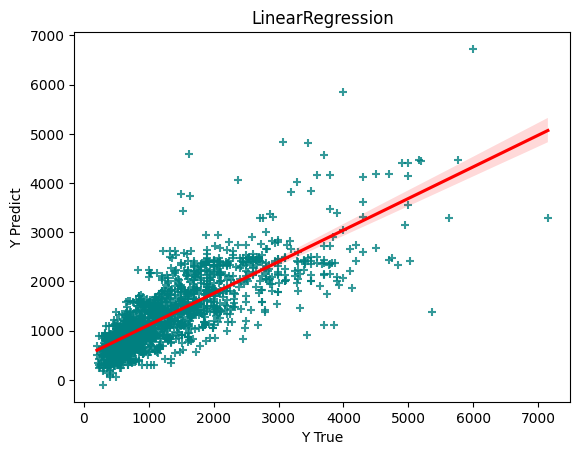

In [120]:
sns.regplot(x=y_train, y=y_pred_linreg_train, marker='+', scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})
plt.title("LinearRegression")
plt.xlabel("Y True")
plt.ylabel("Y Predict")

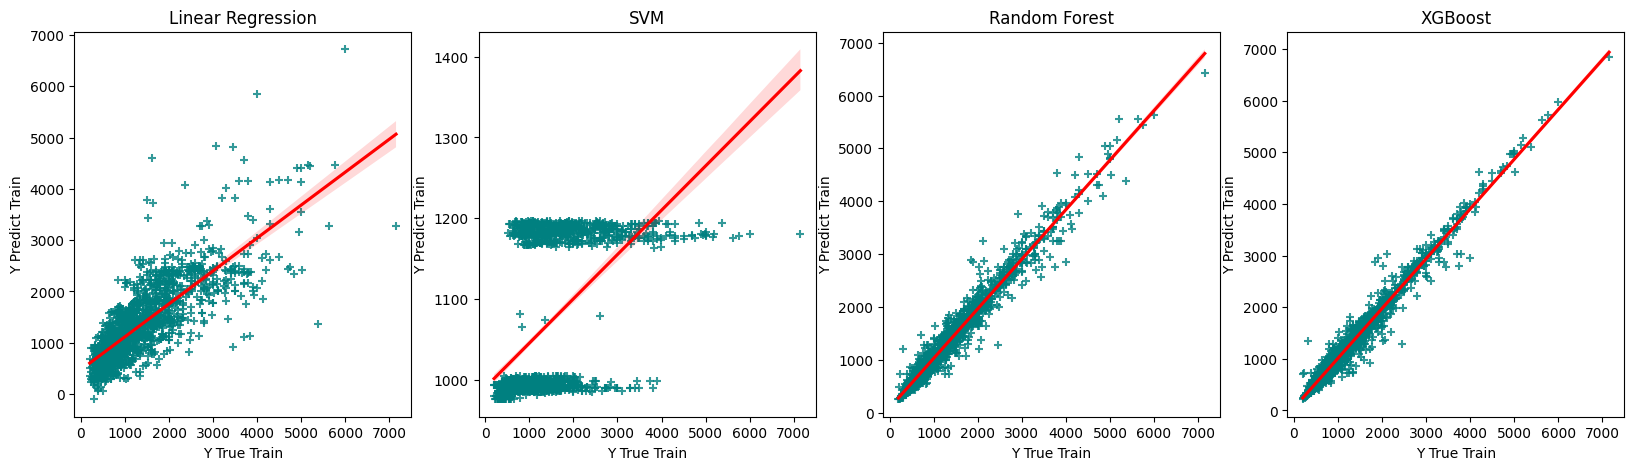

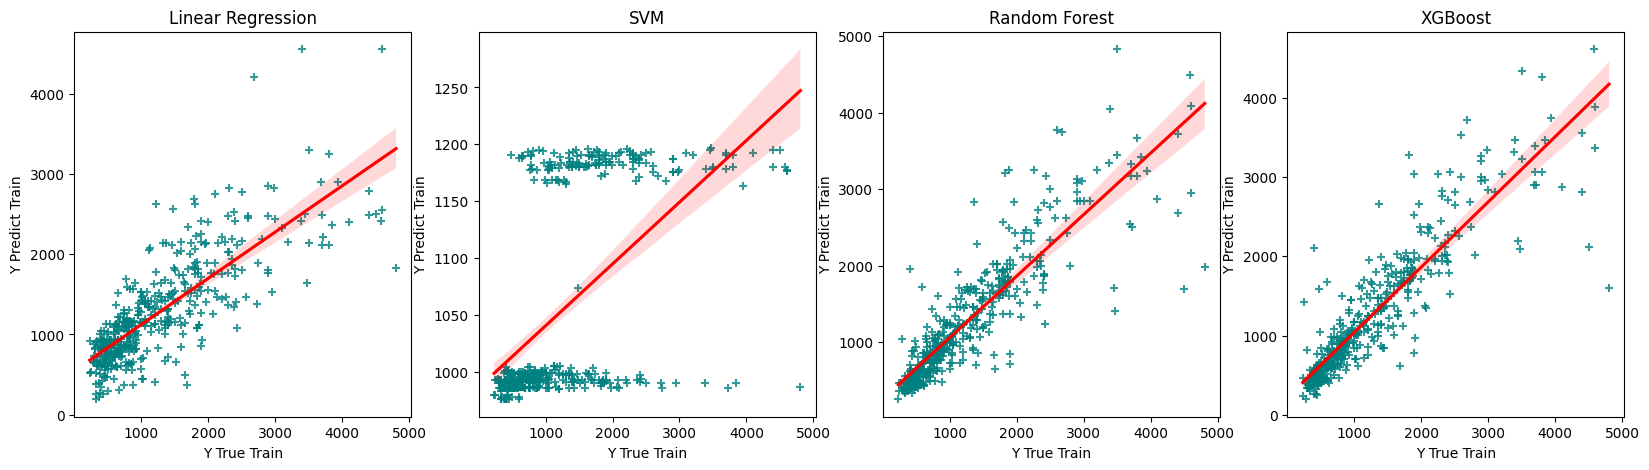

In [139]:
plt.figure(figsize=(20,5))

for index, row in y_pred.iterrows():
    plt.subplot(1,4,index+1)
    sns.regplot(x=y_train, y=row["train"], marker='+', scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})
    plt.title(row["model"])
    plt.xlabel("Y True Train")
    plt.ylabel("Y Predict Train")
    
plt.figure(figsize=(20,5))
for index, row in y_pred.iterrows():
    plt.subplot(1,4,index+1)
    sns.regplot(x=y_test, y=row["test"], marker='+', scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})
    plt.title(row["model"])
    plt.xlabel("Y True Train")
    plt.ylabel("Y Predict Train")